In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import glob
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
cm = plt.cm.get_cmap('RdYlBu')


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastDataC1C1 = pd.read_pickle('../c1c1_scan.pcl')
recastDataC1N1 = pd.read_pickle('../c1n1_scan.pcl')
recastDataC1C1 = recastDataC1C1.round({'tau_ns' : 2, 'mLLP' : 2})
recastDataC1N1 = recastDataC1N1.round({'tau_ns' : 2, 'mLLP' : 2})
print(len(recastDataC1C1))
print(len(recastDataC1N1))

216
212


### Note that the efficiencies are with respect to the number of events after the pT cut! (so we need to rescaled by it). If not pT cut has neen applied the rescaling is 1

In [3]:
effsC1C1 = []
for irow,row in recastDataC1C1.iterrows():
    mLLP = row['mLLP']
    tau = row['tau_ns']
    xsecRatio = row['Total xsec-pTcut (pb)']/row['Total xsec (pb)']
    effLow = row['(SR-Low - no mass Window)'][1]*xsecRatio
    effHigh = row['(SR-High - no mass Window)'][1]*xsecRatio
    effsC1C1.append([mLLP,tau,effLow,effHigh])
effsC1C1 = sorted(effsC1C1)    

In [4]:
np.savetxt('efficiencies_c1c1.txt',effsC1C1,fmt='%.6e',delimiter='  ',
           comments='# Efficiencies for chargino-chargino (without the mass window cut)\n',
          header = '     '.join(['  mC1 (GeV)','tau (ns)', 'eff(SR-Low)', 'eff(SR-High)']))

In [5]:
effsC1N1 = []
for irow,row in recastDataC1N1.iterrows():
    mLLP = row['mLLP']
    tau = row['tau_ns']
    xsecRatio = row['Total xsec-pTcut (pb)']/row['Total xsec (pb)']
    effLow = row['(SR-Low - no mass Window)'][1]*xsecRatio
    effHigh = row['(SR-High - no mass Window)'][1]*xsecRatio
    effsC1N1.append([mLLP,tau,effLow,effHigh])
effsC1N1 = sorted(effsC1N1)    

In [6]:
np.savetxt('efficiencies_c1n1.txt',effsC1N1,fmt='%.6e',delimiter='  ',
           comments='# Efficiencies for chargino-neutralino (without the mass window cut)\n',
          header = '     '.join(['  mC1 (GeV)','tau (ns)', 'eff(SR-Low)', 'eff(SR-High)']))

In [7]:
effsC1C1 = np.array(effsC1C1)
effsC1N1 = np.array(effsC1N1)

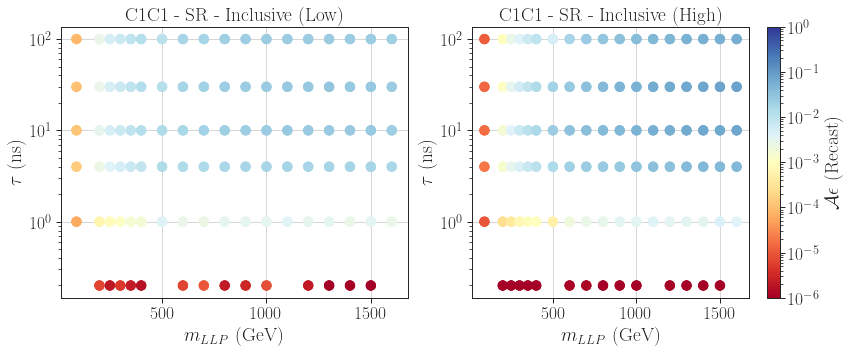

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

ax[0].scatter(x=effsC1C1[:,0],y=effsC1C1[:,1],norm=LogNorm(vmin=1e-6,vmax=1e0),
            c=effsC1C1[:,2],cmap=cm,s=90)

ax[0].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[0].set_ylabel(r'$\tau$ (ns)')

im = ax[1].scatter(x=effsC1C1[:,0],y=effsC1C1[:,1],norm=LogNorm(vmin=1e-6,vmax=1e0),
            c=effsC1C1[:,3],cmap=cm,s=90)

ax[1].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[1].set_ylabel(r'$\tau$ (ns)')


# plt.ylim(500,1200)
# plt.xlim(1,90)
# plt.yticks(np.arange(500.,1200.,100.))
ax[0].grid()
ax[0].set_yscale('log')
ax[0].set_title('C1C1 - SR - Inclusive (Low)')


ax[1].grid()
ax[1].set_yscale('log')
ax[1].set_title('C1C1 - SR - Inclusive (High)')
plt.colorbar(im,label=r'$\mathcal{A}\epsilon$ (Recast)')
# plt.colorbar(im,label=r'$\epsilon$',cax=ax[1] )
# plt.text(0.1,0.7,textstr,fontsize=16,bbox=dict(facecolor='none', edgecolor='black'),
#          transform = plt.gca().transAxes)
# plt.savefig('effRatio.png')
plt.tight_layout()
plt.show()

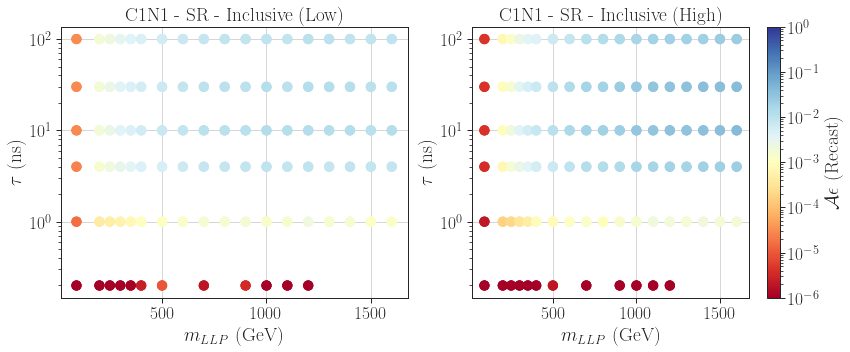

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

ax[0].scatter(x=effsC1N1[:,0],y=effsC1N1[:,1],norm=LogNorm(vmin=1e-6,vmax=1e0),
            c=effsC1N1[:,2],cmap=cm,s=90)

ax[0].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[0].set_ylabel(r'$\tau$ (ns)')

im = ax[1].scatter(x=effsC1N1[:,0],y=effsC1N1[:,1],norm=LogNorm(vmin=1e-6,vmax=1e0),
            c=effsC1N1[:,3],cmap=cm,s=90)

ax[1].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[1].set_ylabel(r'$\tau$ (ns)')


# plt.ylim(500,1200)
# plt.xlim(1,90)
# plt.yticks(np.arange(500.,1200.,100.))
ax[0].grid()
ax[0].set_yscale('log')
ax[0].set_title('C1N1 - SR - Inclusive (Low)')


ax[1].grid()
ax[1].set_yscale('log')
ax[1].set_title('C1N1 - SR - Inclusive (High)')
plt.colorbar(im,label=r'$\mathcal{A}\epsilon$ (Recast)')
# plt.colorbar(im,label=r'$\epsilon$',cax=ax[1] )
# plt.text(0.1,0.7,textstr,fontsize=16,bbox=dict(facecolor='none', edgecolor='black'),
#          transform = plt.gca().transAxes)
# plt.savefig('effRatio.png')
plt.tight_layout()
plt.show()